In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import time
from algo import *
from util import *
from environment import *
from ids import *

In [2]:
def set_experiment6(price_list=np.linspace(0.01,1,100), segments=1000, update_freq=10, T=2000):
    start = time.time()
    exp_MAB_1 = pricing_MAB(price_list=price_list, segments=segments,update_freq=update_freq, exp='exp6', T=T)
    exp_MAB_1.segments_means(param1=3,param2=6)
    df1, df2 = exp_MAB_1.true_optimal()
    print('time:',time.time()-start)
    return exp_MAB_1, df1, df2

The true optimal arm in first 1000 rounds is: 5
The true optimal arm in the rest is: 13
time: 26.200085878372192


<AxesSubplot:ylabel='Density'>

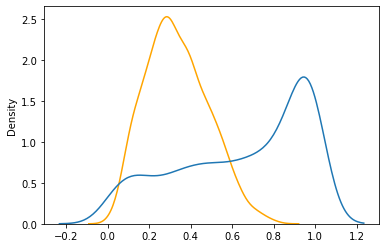

In [3]:
#changeable parameters
np.random.seed(555)
price_list=np.linspace(0.01,1,20)
T = 2000

#fix parameters
segments = 1000
update_freq = 10
trial_rounds = 10
exp_MAB_1, df1, df2 = set_experiment6(price_list=price_list, segments=segments, update_freq =10, T=T)
sns.kdeplot(exp_MAB_1.seg_means, color='orange')
sns.kdeplot(exp_MAB_1.seg_means_2)

In [4]:
#IDS_1
IDS_1_df = pd.DataFrame()
IDS_1_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    IDS_1 = IDS_pull(price_list=price_list, N=update_freq+1, start_L=2, update_L=2,
                     simulate_time_initiate=1, simulate_time_update=1, window_width=100, eg_p=0.1)
    IDS_1_sum, IDS_1_pt, IDS_1_re, IDS_1_arm, IDS_1_post = IDS_1.IDS(T=T, pricing_MAB=exp_MAB_1, mode='mode1',
                                                                     update_style='none', base=1000, p=np.nan,
                                                                     p_y=np.nan, R=np.nan)
    end = time.time()
    print('trial',i, 'IDS_1 time:',end-start)
    exp_MAB_1.reset_t()
    IDS_1_df = IDS_1_df.append([np.cumsum(IDS_1_re)])
    IDS_1_df_arm = IDS_1_df_arm.append([IDS_1_arm])

Reward change detected at time: 712
Detected Sign: -1
eg triggered at  753
arm
1.0     1.000000
3.0     0.474049
4.0     0.299664
5.0     0.308918
6.0     0.904975
7.0     0.007457
8.0     0.036712
11.0    0.612615
14.0    0.045040
17.0    1.000000
Name: pvalue, dtype: float64
tested non-significant , eg_p decayed to 0.010000000000000002
eg triggered at  787
arm
1.0     0.088756
4.0     0.076459
5.0     0.854301
7.0     0.214716
11.0    0.612581
14.0    0.041718
17.0    1.000000
Name: pvalue, dtype: float64
tested non-significant , eg_p decayed to 0.001
Reward change detected at time: 947
Detected Sign: 1
eg triggered at  955
arm
1.0     0.402803
4.0     1.000000
5.0     0.301721
6.0     0.343750
7.0     0.101998
11.0    0.612637
14.0    1.000000
17.0    1.000000
Name: pvalue, dtype: float64
tested non-significant , eg_p decayed to 0.010000000000000002
Detector cooling
Reward change detected at time: 1006
Detected Sign: 1
eg triggered at  1100
arm
1.0     0.005488
4.0     0.012493
5.0 

Reward change detected at time: 1005
Detected Sign: 1
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
eg triggered at  1040
arm
1.0     1.000000
4.0     0.452324
5.0     0.559914
6.0     0.331646
7.0     0.510715
11.0    0.405788
14.0    0.000053
17.0    0.026147
Name: pvalue, dtype: float64
demand shape does not match
Reward change detected at time: 1266
Detected Sign: -1
eg triggered at  1302
arm
1.0     1.000000
4.0     0.404090
7.0     0.676573
10.0    0.618821
11.0    0.533183
14.0    1.000000
17.0    1.000000
Name: pvalue, dtype: float64
tested non-significant , eg_p decayed to 0.010000000000000002
eg triggered at  1336
arm
1.0     0.000338
4.0     1.000000
7.0     0.677806
10.0    0.849144
11.0    1.000000
14.0    0.079119
17.0    0.019235
Name: pvalue, dtype: float64
demand shape does not match
trial 8 IDS_1 time: 109.22381901741028
Reward change detected at time: 722
Detected Sign: -1
eg triggered at  764
arm
1.0     1.0000

In [5]:
#IDST_1
IDST_1_df = pd.DataFrame()
IDST_1_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    IDST_1 = IDS_theta_pull(price_list=price_list, N=update_freq+1, start_L=2, update_L=2,
                     simulate_time_initiate=1, simulate_time_update=1, window_width=100, eg_p=0.1)
    IDST_1_sum, IDST_1_pt, IDST_1_re, IDST_1_arm, IDST_1_post = IDST_1.IDS(T=T, pricing_MAB=exp_MAB_1, mode='mode1',
                                                                     update_style='none', base=1000, p=np.nan,
                                                                     p_y=np.nan, R=np.nan)
    end = time.time()
    print('trial',i, 'IDST_1 time:',end-start)
    exp_MAB_1.reset_t()
    IDST_1_df = IDST_1_df.append([np.cumsum(IDST_1_re)])
    IDST_1_df_arm = IDST_1_df_arm.append([IDST_1_arm])

Reward change detected at time: 1004
Detected Sign: -1
Detector cooling
eg triggered at  1111
arm
1.0     1.000000
4.0     1.000000
5.0     0.301930
6.0     0.380655
7.0     0.000867
8.0     0.771226
11.0    0.076469
14.0    0.064294
17.0    0.303523
Name: pvalue, dtype: float64
demand shape does not match
Reward change detected at time: 1473
Detected Sign: -1
eg triggered at  1534
arm
1.0     0.066715
4.0     0.223336
7.0     1.000000
11.0    1.000000
12.0    0.871199
14.0    0.760894
17.0    0.456196
Name: pvalue, dtype: float64
tested non-significant , eg_p decayed to 0.010000000000000002
eg triggered at  1766
arm
1.0     1.000000
4.0     0.054039
7.0     0.409752
11.0    0.203275
12.0    0.420682
13.0    0.667781
14.0    1.000000
17.0    0.042133
Name: pvalue, dtype: float64
tested non-significant , eg_p decayed to 0.001
trial 0 IDST_1 time: 81.1905951499939
Reward change detected at time: 781
Detected Sign: -1
Detector cooling
eg triggered at  809
arm
1.0     0.503824
4.0     0.83

Reward change detected at time: 1431
Detected Sign: 1
Detector cooling
eg triggered at  1451
arm
1.0     0.025376
4.0     0.605147
7.0     0.000976
10.0    0.512216
11.0    0.536949
14.0    1.000000
17.0    0.736487
Name: pvalue, dtype: float64
demand shape does not match
Reward change detected at time: 1781
Detected Sign: -1
eg triggered at  1781
arm
1.0     1.000000
4.0     1.000000
7.0     0.737693
11.0    0.356448
14.0    0.655882
17.0    0.017508
Name: pvalue, dtype: float64
tested non-significant , eg_p decayed to 0.010000000000000002
Reward change detected at time: 1883
Detected Sign: -1
eg triggered at  1943
arm
1.0     1.000000
4.0     1.000000
7.0     0.375185
8.0     1.000000
9.0     0.843632
11.0    1.000000
14.0    0.286199
17.0    0.514998
Name: pvalue, dtype: float64
tested non-significant , eg_p decayed to 0.010000000000000002
trial 6 IDST_1 time: 138.74021410942078
Reward change detected at time: 1004
Detected Sign: -1
Detector cooling
Detector cooling
Detector cooling

In [6]:
#IDS_2 L=4 n=1
IDS_2_df = pd.DataFrame()
IDS_2_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    IDS_2 = IDS_pull(price_list=price_list, N=update_freq+1, start_L=4, update_L=2,
                     simulate_time_initiate=1, simulate_time_update=1, window_width=100, eg_p=0.1)
    IDS_2_sum, IDS_2_pt, IDS_2_re, IDS_2_arm, IDS_2_post = IDS_2.IDS(T=T, pricing_MAB=exp_MAB_1, mode='mode1',
                                                                     update_style='none', base=1000, p=np.nan,
                                                                     p_y=np.nan, R=np.nan)
    end = time.time()
    print('trial',i, 'IDS_2 time:',end-start)
    IDS_2_df = IDS_2_df.append([np.cumsum(IDS_2_re)])
    IDS_2_df_arm = IDS_2_df_arm.append([IDS_2_arm])
    
#IDS_3 L=2 n=2
IDS_3_df = pd.DataFrame()
IDS_3_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    IDS_3 = IDS_pull(price_list=price_list, N=update_freq+1, start_L=2, update_L=2,
                     simulate_time_initiate=2, simulate_time_update=1, window_width=100, eg_p=0.1)
    IDS_3_sum, IDS_3_pt, IDS_3_re, IDS_3_arm, IDS_3_post = IDS_3.IDS(T=T, pricing_MAB=exp_MAB_1, mode='mode1',
                                                                     update_style='none', base=1000, p=np.nan,
                                                                     p_y=np.nan, R=np.nan)
    end = time.time()
    print('trial',i, 'IDS_3 time:',end-start)
    IDS_3_df = IDS_3_df.append([np.cumsum(IDS_3_re)])
    IDS_3_df_arm = IDS_3_df_arm.append([IDS_3_arm])

Reward change detected at time: 176
Detected Sign: -1
eg triggered at  198
arm
1.0     1.000000
3.0     0.640880
4.0     0.713871
5.0     0.775142
7.0     0.528810
8.0     0.017353
11.0    1.000000
14.0    0.092505
17.0    1.000000
Name: pvalue, dtype: float64
tested non-significant , eg_p decayed to 0.010000000000000002
eg triggered at  239
arm
1.0     1.000000
4.0     0.066116
5.0     0.470487
7.0     0.757336
11.0    0.618254
14.0    1.000000
17.0    1.000000
Name: pvalue, dtype: float64
tested non-significant , eg_p decayed to 0.001
eg triggered at  568
arm
1.0     1.000000
4.0     1.000000
5.0     0.073120
7.0     1.000000
11.0    0.022049
14.0    1.000000
17.0    1.000000
Name: pvalue, dtype: float64
tested non-significant , eg_p decayed to 0.0001
Reward change detected at time: 709
Detected Sign: -1
Detector cooling
eg triggered at  726
arm
1.0     0.384573
4.0     0.070376
5.0     0.233493
6.0     0.206784
7.0     1.000000
11.0    1.000000
14.0    0.094451
17.0    1.000000
Name

eg triggered at  848
arm
1.0     0.406250
4.0     1.000000
6.0     0.427980
7.0     1.000000
11.0    0.613658
14.0    1.000000
17.0    1.000000
Name: pvalue, dtype: float64
tested non-significant , eg_p decayed to 0.001
eg triggered at  922
arm
1.0     0.406250
4.0     0.499166
6.0     0.466306
7.0     0.750802
11.0    0.292006
14.0    1.000000
17.0    1.000000
Name: pvalue, dtype: float64
tested non-significant , eg_p decayed to 0.0001
Reward change detected at time: 1002
Detected Sign: -1
eg triggered at  1056
arm
1.0     0.006822
4.0     0.006677
7.0     0.210200
8.0     0.830567
9.0     0.496794
11.0    0.053405
14.0    0.650490
17.0    0.010227
Name: pvalue, dtype: float64
tested non-significant , eg_p decayed to 0.010000000000000002
eg triggered at  1118
arm
1.0     1.000000
4.0     0.006674
7.0     0.572084
11.0    0.001280
14.0    0.000126
17.0    0.000261
Name: pvalue, dtype: float64
demand shape does not match
Reward change detected at time: 1294
Detected Sign: -1
eg triggere

trial 2 IDS_3 time: 95.65536904335022
Reward change detected at time: 1019
Detected Sign: 1
eg triggered at  1070
arm
1.0     0.007174
4.0     0.018695
5.0     0.015580
6.0     0.021928
7.0     0.682958
8.0     0.170722
11.0    0.525643
14.0    0.002748
17.0    0.000316
Name: pvalue, dtype: float64
demand shape does not match
Reward change detected at time: 1634
Detected Sign: -1
Detector cooling
eg triggered at  1656
arm
1.0     0.006459
4.0     0.120872
7.0     1.000000
11.0    1.000000
13.0    1.000000
14.0    0.589971
17.0    1.000000
Name: pvalue, dtype: float64
demand shape does not match
trial 3 IDS_3 time: 82.66281318664551
Reward change detected at time: 352
Detected Sign: -1
Detector cooling
eg triggered at  406
arm
1.0     1.000000
4.0     1.000000
5.0     0.772072
6.0     0.429060
7.0     0.652344
11.0    1.000000
14.0    1.000000
17.0    1.000000
Name: pvalue, dtype: float64
tested non-significant , eg_p decayed to 0.010000000000000002
Reward change detected at time: 536
D

eg triggered at  373
arm
1.0     0.054810
4.0     0.034037
7.0     0.341525
11.0    1.000000
14.0    1.000000
17.0    1.000000
Name: pvalue, dtype: float64
tested non-significant , eg_p decayed to 0.001
eg triggered at  425
arm
1.0     1.000000
4.0     0.156504
7.0     0.108836
11.0    1.000000
14.0    1.000000
17.0    1.000000
Name: pvalue, dtype: float64
tested non-significant , eg_p decayed to 0.0001
Reward change detected at time: 1006
Detected Sign: -1
Detector cooling
eg triggered at  1021
arm
1.0     1.000000
4.0     0.417228
5.0     0.147118
6.0     0.163614
7.0     0.208571
11.0    0.051178
14.0    0.005360
17.0    1.000000
Name: pvalue, dtype: float64
demand shape does not match
Reward change detected at time: 1175
Detected Sign: -1
Detector cooling
eg triggered at  1207
arm
1.0     1.000000
4.0     0.411302
7.0     0.241633
10.0    0.730778
11.0    0.532660
14.0    0.105249
17.0    1.000000
Name: pvalue, dtype: float64
tested non-significant , eg_p decayed to 0.0100000000000

In [7]:
#IDS without transferability test
IDSN_df = pd.DataFrame()
IDSN_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    IDSN = IDS_pull(price_list=price_list, N=update_freq+1, start_L=4, update_L=0,
                     simulate_time_initiate=1, simulate_time_update=1, window_width=100, eg_p=0)
    IDSN_sum, IDSN_pt, IDSN_re, IDSN_arm, IDSN_post = IDSN.IDS(T=T, pricing_MAB=exp_MAB_1, mode='mode1',
                                                                     update_style='none', base=1000, p=np.nan,
                                                                     p_y=np.nan, R=np.nan)
    end = time.time()
    print('trial',i, 'IDSN time:',end-start)
    IDSN_df = IDSN_df.append([np.cumsum(IDSN_re)])
    IDSN_df_arm = IDSN_df_arm.append([IDSN_arm])
    
#IDS with window likelihood
IDSW_df = pd.DataFrame()
IDSW_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    IDSW = IDS_pull(price_list=price_list, N=update_freq+1, start_L=4, update_L=0, update_during_exploit=True,
                     simulate_time_initiate=1, simulate_time_update=1, window_width=100, eg_p=0)
    IDSW_sum, IDSW_pt, IDSW_re, IDSW_arm, IDSW_post = IDSW.IDS(T=T, pricing_MAB=exp_MAB_1, mode='mode1',
                                                                     update_style='none', base=1000, p=np.nan,
                                                                     p_y=np.nan, R=np.nan)
    end = time.time()
    print('trial',i, 'IDSW time:',end-start)
    IDSW_df = IDSW_df.append([np.cumsum(IDSW_re)])
    IDSW_df_arm = IDSW_df_arm.append([IDSW_arm])

Reward change detected at time: 1554
Detected Sign: 1
Reward change detected at time: 1876
Detected Sign: 1
trial 0 IDSN time: 32.09074306488037
Reward change detected at time: 426
Detected Sign: -1
Reward change detected at time: 631
Detected Sign: 1
Detector cooling
Detector cooling
Reward change detected at time: 798
Detected Sign: -1
Detector cooling
Reward change detected at time: 1004
Detected Sign: -1
Detector cooling
Detector cooling
trial 1 IDSN time: 61.95343279838562
Reward change detected at time: 578
Detected Sign: -1
Reward change detected at time: 834
Detected Sign: -1
Reward change detected at time: 1011
Detected Sign: 1
Detector cooling
Reward change detected at time: 1267
Detected Sign: 1
Reward change detected at time: 1851
Detected Sign: 1
trial 2 IDSN time: 71.88767004013062
Reward change detected at time: 327
Detected Sign: -1
Reward change detected at time: 711
Detected Sign: -1
Reward change detected at time: 907
Detected Sign: 1
Detector cooling
Reward change d

In [202]:
# UCB1 c=1
UCB_1_df = pd.DataFrame()
UCB_1_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    UCB1 = UCBPI_pull(price_list=price_list, segments=segments, c=1, bias=0, UCB1=True, tuned=False)
    UCB1_sum, UCB1_pt, UCB1_re, UCB1_arm = UCB1.UCBPI(T=T, pricing_MAB=exp_MAB_1)
    end = time.time()
    print('trial',i, 'UCB_1 time:',end-start)
    UCB_1_df = UCB_1_df.append([np.cumsum(UCB1_re)])
    UCB_1_df_arm = UCB_1_df_arm.append([UCB1_arm])

# UCB1 c=2
UCB_2_df = pd.DataFrame()
UCB_2_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    UCB1 = UCBPI_pull(price_list=price_list, segments=segments, c=2, bias=0, UCB1=True, tuned=False)
    UCB1_sum, UCB1_pt, UCB1_re, UCB1_arm = UCB1.UCBPI(T=T, pricing_MAB=exp_MAB_1)
    end = time.time()
    print('trial',i, 'UCB_2 time:',end-start)
    UCB_2_df = UCB_2_df.append([np.cumsum(UCB1_re)])
    UCB_2_df_arm = UCB_2_df_arm.append([UCB1_arm])
    

# UCB-tuned
UCBT_df = pd.DataFrame()
UCBT_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    UCB1 = UCBPI_pull(price_list=price_list, segments=segments, c=2, bias=0, UCB1=True, tuned=True)
    UCB1_sum, UCB1_pt, UCB1_re, UCB1_arm = UCB1.UCBPI(T=T, pricing_MAB=exp_MAB_1)
    end = time.time()
    print('trial',i, 'UCB-tuned time:',end-start)
    UCBT_df = UCBT_df.append([np.cumsum(UCB1_re)])
    UCBT_df_arm = UCBT_df_arm.append([UCB1_arm])
    
# UCBPI
UCBPI_df = pd.DataFrame()
UCBPI_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    UCBPI = UCBPI_pull(price_list=price_list, segments=segments, c=4, bias=0, UCB1=False, tuned=False)
    UCBPI_sum, UCBPI_pt, UCBPI_re, UCBPI_arm = UCBPI.UCBPI(T=T, pricing_MAB=exp_MAB_1)
    end = time.time()
    print('trial',i, 'UCBPI time:',end-start)
    UCBPI_df = UCBPI_df.append([np.cumsum(UCBPI_re)])
    UCBPI_df_arm = UCBPI_df_arm.append([UCBPI_arm])
    
# TS
TS_df = pd.DataFrame()
TS_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    TS = TS_pull(price_list=price_list, est='MEAN')
    TS_sum, TS_pt, TS_re, TS_arm = TS.TS(T=T, pricing_MAB=exp_MAB_1)
    end = time.time()
    print('trial',i, 'TS time:',end-start)
    TS_df = TS_df.append([np.cumsum(TS_re)])
    TS_df_arm = TS_df_arm.append([TS_arm])

# EG e=0.05
EG_1_df = pd.DataFrame()
EG_1_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    EG = EG_pull(price_list=price_list)
    EG_sum, EG_pt, EG_re, EG_arm = EG.EG(T=T, pricing_MAB=exp_MAB_1, e=0.05)
    end = time.time()
    print('trial',i, 'EG 0.05 time:',end-start)
    EG_1_df = EG_1_df.append([np.cumsum(EG_re)])
    EG_1_df_arm = EG_1_df_arm.append([EG_arm])

# EG p=0.1
EG_2_df = pd.DataFrame()
EG_2_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    EG = EG_pull(price_list=price_list)
    EG_sum, EG_pt, EG_re, EG_arm = EG.EG(T=T, pricing_MAB=exp_MAB_1, e=0.1)
    end = time.time()
    print('trial',i, 'EG 0.1 time:',end-start)
    EG_2_df = EG_2_df.append([np.cumsum(EG_re)])
    EG_2_df_arm = EG_2_df_arm.append([EG_arm])
    
# EG e=0.15
EG_3_df = pd.DataFrame()
EG_3_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    EG = EG_pull(price_list=price_list)
    EG_sum, EG_pt, EG_re, EG_arm = EG.EG(T=T, pricing_MAB=exp_MAB_1, e=0.15)
    end = time.time()
    print('trial',i, 'EG 0.15 time:',end-start)
    EG_3_df = EG_3_df.append([np.cumsum(EG_re)])
    EG_3_df_arm = EG_3_df_arm.append([EG_arm])

trial 0 UCB_1 time: 0.7842168807983398
trial 1 UCB_1 time: 0.8575029373168945
trial 2 UCB_1 time: 0.742279052734375
trial 3 UCB_1 time: 0.7357540130615234
trial 4 UCB_1 time: 0.8025789260864258
trial 5 UCB_1 time: 0.8083078861236572
trial 6 UCB_1 time: 0.75860595703125
trial 7 UCB_1 time: 0.7560539245605469
trial 8 UCB_1 time: 0.7665019035339355
trial 9 UCB_1 time: 0.76212477684021
trial 0 UCB_2 time: 0.7527580261230469
trial 1 UCB_2 time: 0.7613010406494141
trial 2 UCB_2 time: 0.7860257625579834
trial 3 UCB_2 time: 0.7724759578704834
trial 4 UCB_2 time: 0.8774452209472656
trial 5 UCB_2 time: 0.7466669082641602
trial 6 UCB_2 time: 0.7388660907745361
trial 7 UCB_2 time: 0.7886989116668701
trial 8 UCB_2 time: 0.7586379051208496
trial 9 UCB_2 time: 0.7485630512237549
trial 0 UCB-tuned time: 1.4331300258636475
trial 1 UCB-tuned time: 1.385606050491333
trial 2 UCB-tuned time: 1.3996009826660156
trial 3 UCB-tuned time: 1.3862330913543701
trial 4 UCB-tuned time: 1.4941480159759521
trial 5 UCB

In [9]:
IDS_1_df = IDS_1_df.iloc[:,:2000]
IDS_2_df = IDS_2_df.iloc[:,:2000]
IDS_3_df = IDS_3_df.iloc[:,:2000]
IDST_1_df = IDST_1_df.iloc[:,:2000]
IDSN_df = IDSTN_df.iloc[:,:2000]
IDSW_df = IDSTW_df.iloc[:,:2000]
IDS_1_df_arm = IDS_1_df_arm.iloc[:,:2000]
IDS_2_df_arm = IDS_2_df_arm.iloc[:,:2000]
IDS_3_df_arm = IDS_3_df_arm.iloc[:,:2000]
IDST_1_df_arm = IDST_1_df_arm.iloc[:,:2000]
IDSN_df_arm = IDSN_df_arm.iloc[:,:2000]
IDSW_df_arm = IDSW_df_arm.iloc[:,:2000]

In [270]:
def draw_regret_6(optimal_reward, IDS_3, IDST_1, IDSN, IDSW, UCB_1, UCB_2, UCBT, UCBPI, TS, EG_1, EG_2, EG_3, title, bounds=True):
    
    IDS_3_mean = (optimal_reward - IDS_3.mean()).values[0]
    IDST_1_mean = (optimal_reward - IDST_1.mean()).values[0]
    IDSN_mean = (optimal_reward - IDSN.mean()).values[0]
    IDSW_mean = (optimal_reward - IDSW.mean()).values[0]
    UCB_1_mean = (optimal_reward - UCB_1.mean()).values[0]
    UCB_2_mean = (optimal_reward - UCB_2.mean()).values[0]
    UCBT_mean = (optimal_reward - UCBT.mean()).values[0]
    UCBPI_mean = (optimal_reward - UCBPI.mean()).values[0]
    TS_mean = (optimal_reward - TS.mean()).values[0]
    EG_1_mean = (optimal_reward - EG_1.mean()).values[0]
    EG_2_mean = (optimal_reward - EG_2.mean()).values[0]
    EG_3_mean = (optimal_reward - EG_3.mean()).values[0]
    
    T = np.arange(EG_1.shape[1])
    trial = EG_1.shape[0]
    
    plt.figure(figsize=(30,20))
    sns.set(font_scale=2, style='white')
    
    plt.plot(EG_1_mean,alpha=1,color='#000000', linestyle='-')
    plt.plot(EG_2_mean,alpha=1,color='#000000', linestyle='-.')    
    plt.plot(EG_3_mean,alpha=1,color='#000000', linestyle='--')
    
    plt.plot(TS_mean,alpha=1,color='#666666', linestyle='-')
    
    plt.plot(UCB_1_mean,alpha=1,color='#666600', linestyle='-')
    plt.plot(UCB_2_mean,alpha=1,color='#666600', linestyle='-.')
    plt.plot(UCBT_mean,alpha=1,color='#666600', linestyle='--')
    plt.plot(UCBPI_mean,alpha=1,color='#666600', linestyle=':')


    plt.plot(IDS_3_mean,alpha=1,color='#FF6666', linestyle='-')
    plt.plot(IDST_1_mean,alpha=1,color='#FF6666', linestyle=':')
    plt.plot(IDSN_mean,alpha=1,color='#0000FF', linestyle='-')
    plt.plot(IDSW_mean,alpha=1,color='#FFA500', linestyle='-')
    
    if bounds:
        plt.fill_between(T, get_low(optimal_reward, EG_1), get_high(optimal_reward, EG_1), color='#000000', alpha=0.1)
        plt.fill_between(T, get_low(optimal_reward, EG_2), get_high(optimal_reward, EG_2), color='#000000', alpha=0.1)
        plt.fill_between(T, get_low(optimal_reward, EG_3), get_high(optimal_reward, EG_3), color='#000000', alpha=0.1)
        plt.fill_between(T, get_low(optimal_reward, TS), get_high(optimal_reward, TS), color='#666666', alpha=0.05)
        plt.fill_between(T, get_low(optimal_reward, UCB_1), get_high(optimal_reward, UCB_1), color='#666600', alpha=0.05)
        plt.fill_between(T, get_low(optimal_reward, UCB_2), get_high(optimal_reward, UCB_2), color='#666600', alpha=0.05)
        plt.fill_between(T, get_low(optimal_reward, UCBT), get_high(optimal_reward, UCBT), color='#666600', alpha=0.05)
        plt.fill_between(T, get_low(optimal_reward, UCBPI), get_high(optimal_reward, UCBPI), color='#666600', alpha=0.05)
        plt.fill_between(T, get_low(optimal_reward, IDS_3), get_high(optimal_reward, IDS_3), color='#FF6666', alpha=0.1)
        plt.fill_between(T, get_low(optimal_reward, IDST_1), get_high(optimal_reward, IDST_1), color='#FF6666', alpha=0.1)
        plt.fill_between(T, get_low(optimal_reward, IDSN), get_high(optimal_reward, IDSN), color='#0000FF', alpha=0.05)
        plt.fill_between(T, get_low(optimal_reward, IDSW), get_high(optimal_reward, IDSW), color='#FFA500', alpha=0.1)
        
        
    plt.legend(['EG $ε$=0.05', 'EG $ε$=0.1', 'EG $ε$-0.15', 'TS', 'UCB c=1', 'UCB c=2', 'UCB-tuned',
                'UCBPI', 'ACIDP L=2, n=2', 'ACIDP-$θ$ L=2, n=1', 'ACIDP-without Transferability Test L=2, n=1', 'ACIDP-Variant L=2, n=1'],
              bbox_to_anchor=(0.98, -0.05), ncol=6, fancybox=True)
    plt.title(title)
    plt.xlabel('Horizon')
    plt.ylabel('Cumulative Regret')
    plt.show()

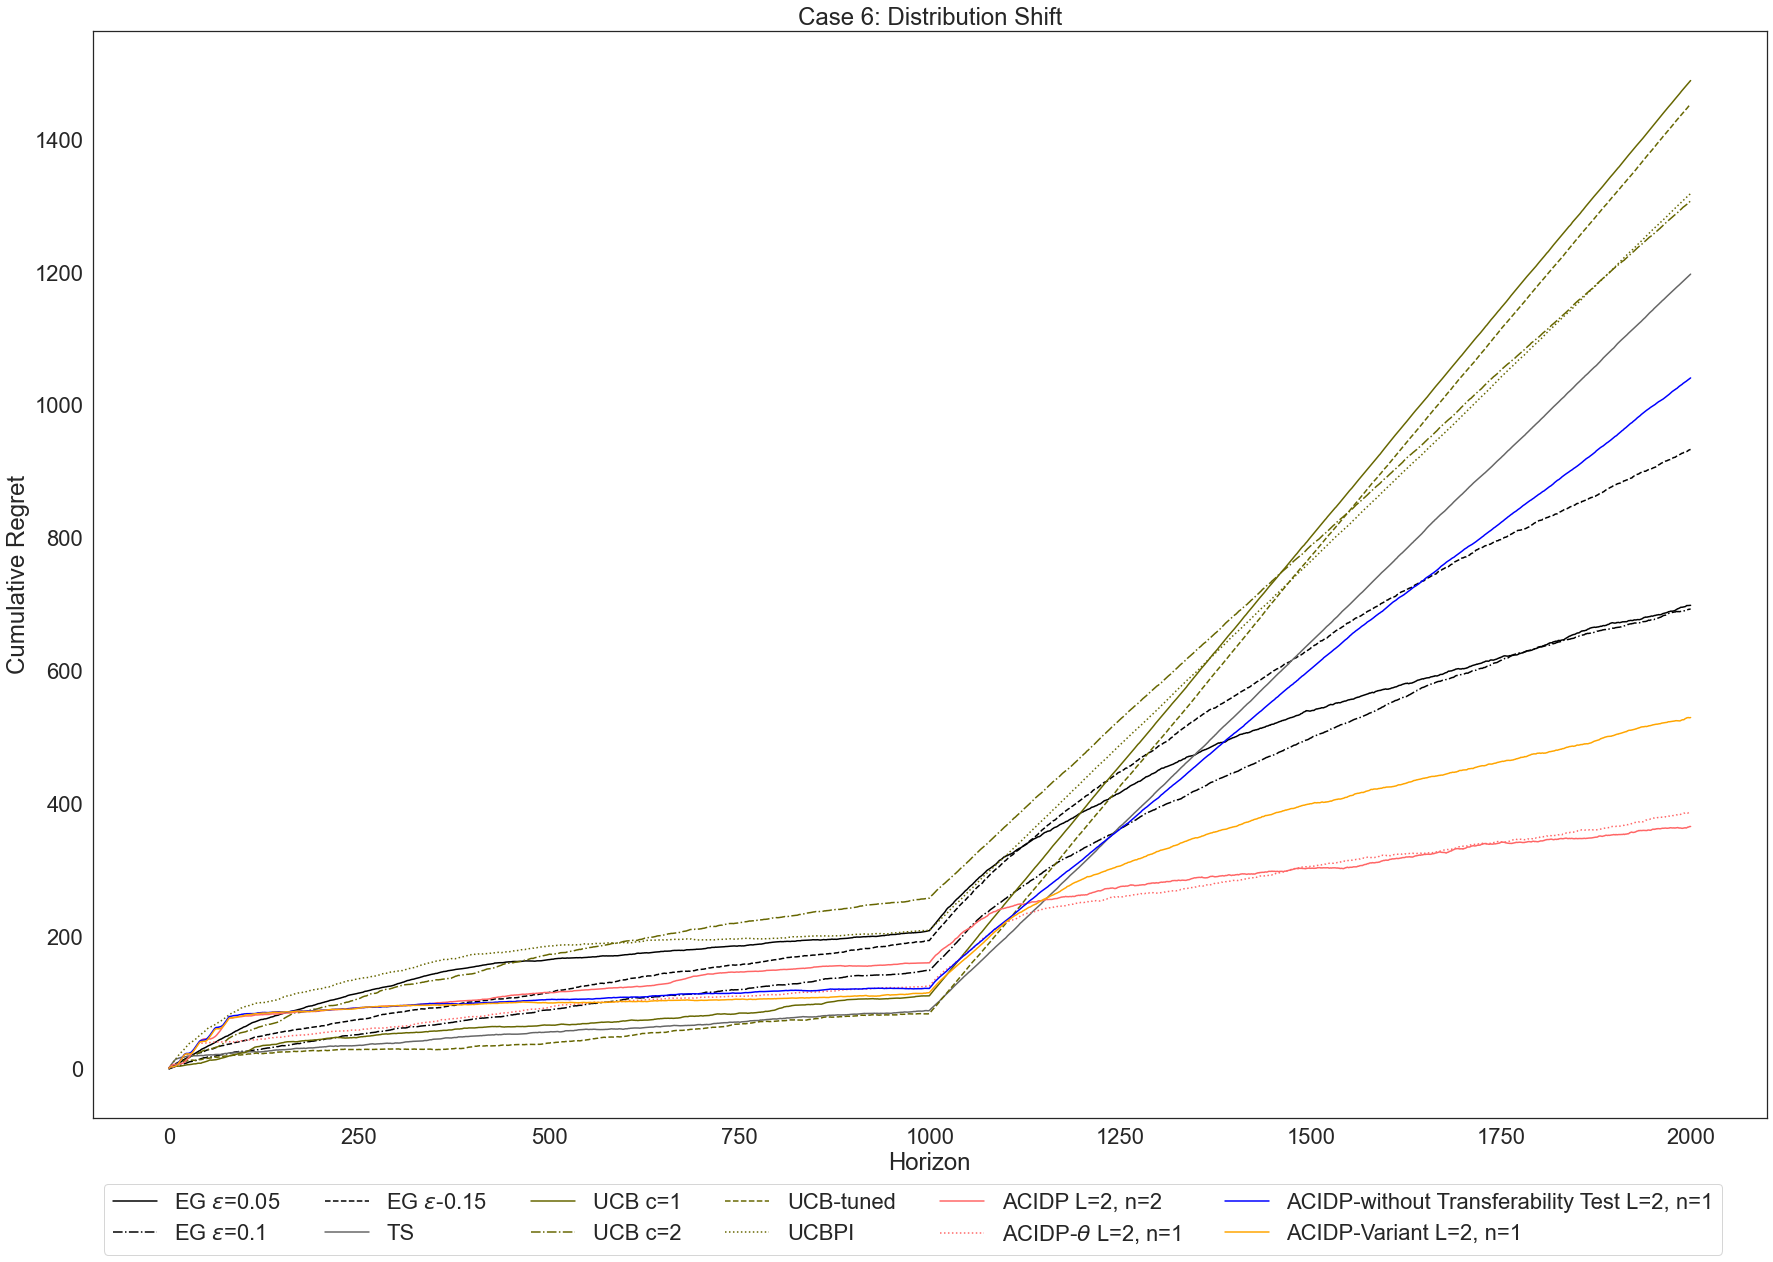

In [272]:
title = 'Case 6: Distribution Shift'
draw_regret_6(optimal_reward, IDS_3_df, IDST_1_df, IDSN_df, IDSW_df, UCB_1_df, UCB_2_df, UCBT_df,UCBPI_df,TS_df,EG_1_df, EG_2_df, EG_3_df, title, bounds=False)

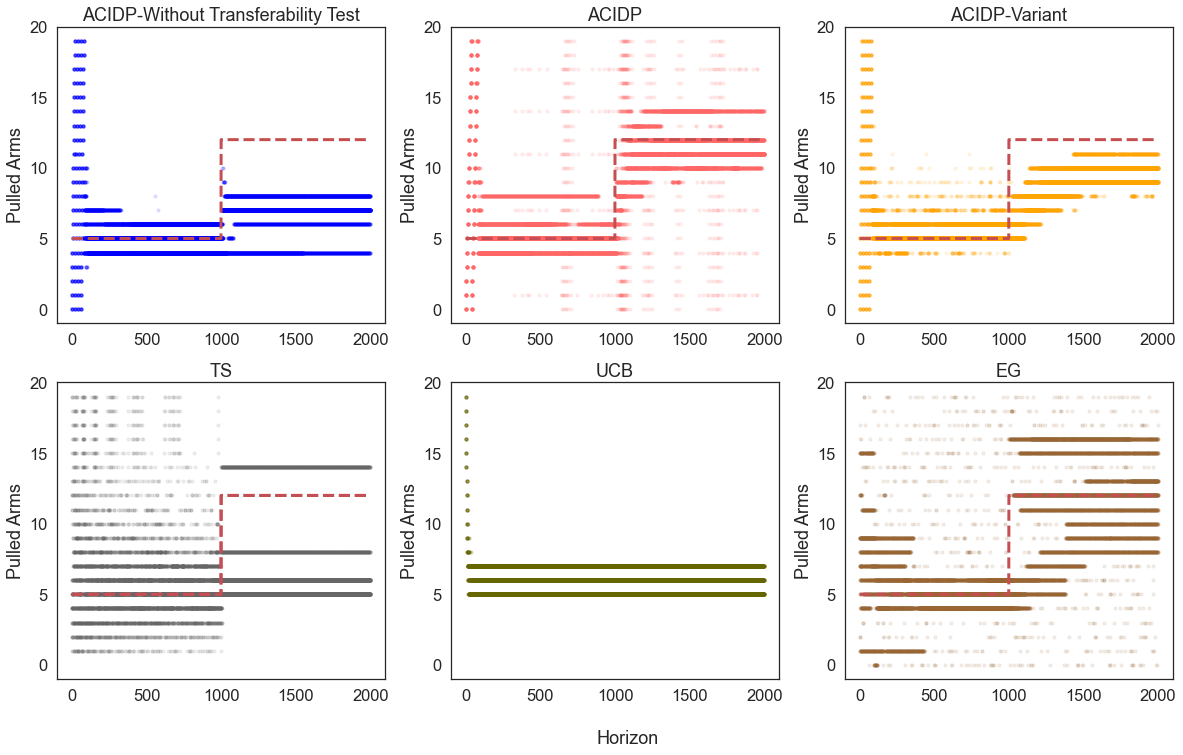

In [275]:
draw_arm_withopt_6(IDSN_df_arm, IDSW_df_arm, IDS_3_df_arm.drop(columns='policy'), UCB_2_df_arm, TS_df_arm, EG_1_df_arm,
                   np.append(np.repeat(5,T/2), np.repeat(12,T/2)))

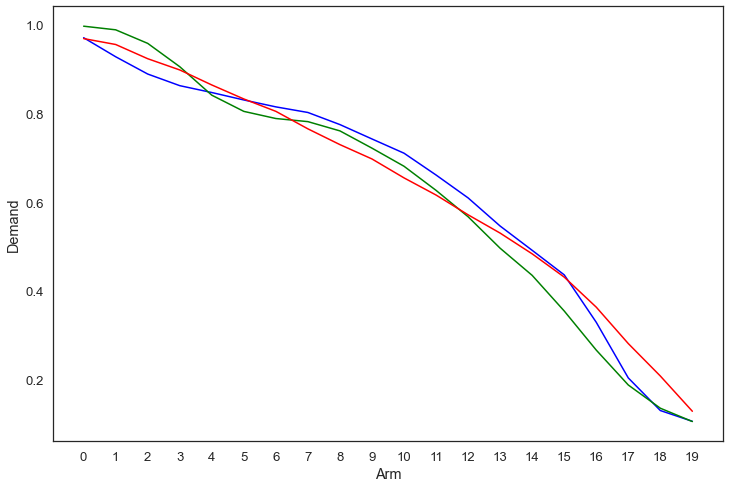

In [95]:
#Est
sns.set(font_scale=1.2, style='white')
plt.figure(figsize=(12,8))
sns.lineplot(data=IDS_1.get_p_a_y() @ np.linspace(1, 10, 11) / 10, color='blue')
sns.lineplot(data=IDST_1.get_p_a_y() @ np.linspace(1, 10, 11) / 10, color='green')
#True
df2['demand'] = df2['reward'] / df2['price']
sns.lineplot(data=df2.groupby('arm').demand.mean()/10, color='red')
plt.ylabel('Demand')
plt.xlabel('Arm')
plt.xticks(np.arange(20))
plt.show()

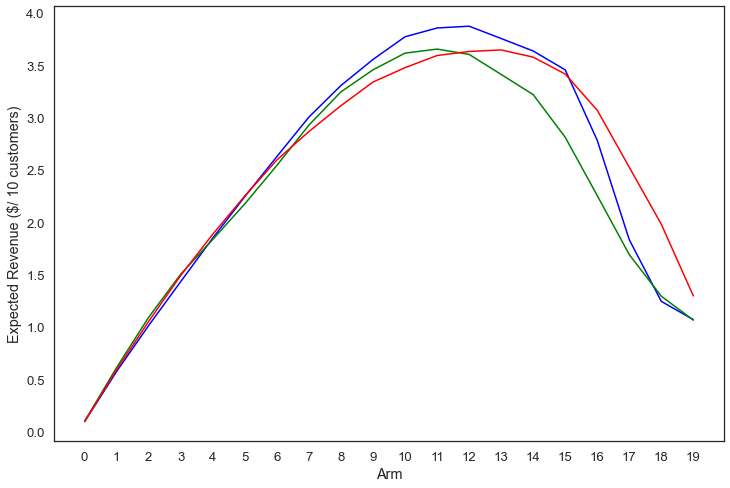

In [98]:
#Est
plt.figure(figsize=(12,8))
sns.lineplot(data=IDS_1.get_p_a_y() @ np.linspace(1, 10, 11) * price_list, color='blue')
sns.lineplot(data=IDST_1.get_p_a_y() @ np.linspace(1, 10, 11) * price_list, color='green')
#True
df2['demand'] = df2['reward'] / df2['price']
sns.lineplot(data=df2.groupby('arm').demand.mean() * price_list, color='red')
plt.ylabel('Expected Revenue ($/ 10 customers)')
plt.xlabel('Arm')
plt.xticks(np.arange(20))
plt.show()

In [276]:
# IDS_1_df_arm['policy'] = 'IDS_1'
# IDS_2_df_arm['policy'] = 'IDS_2'
# IDS_3_df_arm['policy'] = 'IDS_3'
# IDST_1_df_arm['policy'] = 'IDST_1'
# IDSN_df_arm['policy'] = 'IDSN'
# IDSW_df_arm['policy'] = 'IDSW'
# UCB_1_df_arm['policy'] = 'UCB_1'
# UCB_2_df_arm['policy'] = 'UCB_2'
# UCBT_df_arm['policy'] = 'UCBT'
# UCBPI_df_arm['policy'] = 'UCBPI'
# TS_df_arm['policy'] = 'TS'
# EG_1_df_arm['policy'] = 'EG_1'
# EG_2_df_arm['policy'] = 'EG_2'
# EG_3_df_arm['policy'] = 'EG_3'

# IDS_1_df['policy'] = 'IDS_1'
# IDS_2_df['policy'] = 'IDS_2'
# IDS_3_df['policy'] = 'IDS_3'
# IDST_1_df['policy'] = 'IDST_1'
# IDSN_df['policy'] = 'IDSN'
# IDSW_df['policy'] = 'IDSW'
# UCB_1_df['policy'] = 'UCB_1'
# UCB_2_df['policy'] = 'UCB_2'
# UCBT_df['policy'] = 'UCBT'
# UCBPI_df['policy'] = 'UCBPI'
# TS_df['policy'] = 'TS'
# EG_1_df['policy'] = 'EG_1'
# EG_2_df['policy'] = 'EG_2'
# EG_3_df['policy'] = 'EG_3'
# exp_reward = IDS_1_df.append(IDS_2_df).append(IDS_3_df).append(IDS_3_df).append(IDS_3_df).append(IDST_1_df)\
#             .append(IDSN_df).append(IDSW_df).append(UCB_1_df).append(UCB_2_df).append(UCBT_df)\
#             .append(UCBPI_df).append(TS_df).append(EG_1_df).append(EG_2_df).append(EG_3_df)
# exp_arm = IDS_1_df_arm.append(IDS_2_df_arm).append(IDS_3_df_arm).append(IDS_3_df_arm).append(IDS_3_df_arm)\
#         .append(IDST_1_df_arm).append(IDSN_df_arm).append(IDSW_df_arm).append(UCB_1_df_arm)\
#         .append(UCB_2_df_arm).append(UCBT_df_arm).append(UCBPI_df_arm).append(TS_df_arm).append(EG_1_df_arm)\
#         .append(EG_2_df_arm).append(EG_3_df_arm)
# exp_reward.to_csv('exp6_reward.csv')
# exp_arm.to_csv('exp6_arm.csv')
# exp_reward.groupby('policy').agg({1999:['mean', 'std', 'min', 'max']}).to_csv('exp6_summary.csv')

In [46]:
def draw_regret(optimal_reward, groups, title, bounds=True):
    
    IDS_1_mean = (optimal_reward - groups.loc['IDS_1'].values).values[0]
    IDS_2_mean = (optimal_reward - groups.loc['IDS_2'].values).values[0]
    IDS_3_mean = (optimal_reward - groups.loc['IDS_3'].values).values[0]
    IDST_1_mean = (optimal_reward - groups.loc['IDST_1'].values).values[0]
    IDSN_mean = (optimal_reward - groups.loc['IDSN'].values).values[0]
    IDSW_mean = (optimal_reward - groups.loc['IDSW'].values).values[0]
    UCB_1_mean = (optimal_reward - groups.loc['UCB_1'].values).values[0]
    UCB_2_mean = (optimal_reward - groups.loc['UCB_2'].values).values[0]
    UCBT_mean = (optimal_reward - groups.loc['UCBT'].values).values[0]
    UCBPI_mean = (optimal_reward - groups.loc['UCBPI'].values).values[0]
    TS_mean = (optimal_reward - groups.loc['TS'].values).values[0]
    EG_1_mean = (optimal_reward - groups.loc['EG_1'].values).values[0]
    EG_2_mean = (optimal_reward - groups.loc['EG_2'].values).values[0]
    EG_3_mean = (optimal_reward - groups.loc['EG_3'].values).values[0]
    
    T = np.arange(2000)
    trial = 10
    
    plt.figure(figsize=(30,20))
    sns.set(font_scale=2, style='white')
    
    plt.plot(EG_1_mean,alpha=1,color='#979DAC', linestyle='--', linewidth=3)
    plt.plot(EG_2_mean,alpha=1,color='#7D8597', linestyle='--', linewidth=3)
    plt.plot(EG_3_mean,alpha=1,color='#5C677D', linestyle='--', linewidth=3)
    plt.plot(TS_mean,alpha=1,color='#33415C', linestyle='--', linewidth=3)
    
    plt.plot(UCB_1_mean,alpha=1,color='#979DAC', linestyle=':', linewidth=3)
    plt.plot(UCB_2_mean,alpha=1,color='#7D8597', linestyle=':', linewidth=3)
    plt.plot(UCBT_mean,alpha=1,color='#5C677D', linestyle=':', linewidth=3)
    plt.plot(UCBPI_mean,alpha=1,color='#33415C', linestyle=':', linewidth=3)


#     plt.plot(IDS_1_mean,alpha=1,color='#FF0000', linestyle='-', linewidth=4)
#     plt.plot(IDS_2_mean,alpha=1,color='#FF8700', linestyle='-', linewidth=4)
    plt.plot(IDS_3_mean,alpha=1,color='#FFD300', linestyle='-', linewidth=4)
    plt.plot(IDST_1_mean,alpha=1,color='#FF8FA3', linestyle='-', linewidth=4)
    plt.plot(IDSN_mean,alpha=1,color='#147DF5', linestyle='-.', linewidth=4)
    plt.plot(IDSW_mean,alpha=1,color='#DEFF0A', linestyle='-', linewidth=4)

    
    if bounds:
        plt.fill_between(T, get_low(optimal_reward, EG_1), get_high(optimal_reward, EG_1), color='#000000', alpha=0.1)
        plt.fill_between(T, get_low(optimal_reward, EG_2), get_high(optimal_reward, EG_2), color='#000000', alpha=0.1)
        plt.fill_between(T, get_low(optimal_reward, EG_3), get_high(optimal_reward, EG_3), color='#000000', alpha=0.1)
        plt.fill_between(T, get_low(optimal_reward, TS), get_high(optimal_reward, TS), color='#666666', alpha=0.05)
        plt.fill_between(T, get_low(optimal_reward, UCB_1), get_high(optimal_reward, UCB_1), color='#666600', alpha=0.05)
        plt.fill_between(T, get_low(optimal_reward, UCB_2), get_high(optimal_reward, UCB_2), color='#666600', alpha=0.05)
        plt.fill_between(T, get_low(optimal_reward, UCBT), get_high(optimal_reward, UCBT), color='#666600', alpha=0.05)
        plt.fill_between(T, get_low(optimal_reward, UCBPI), get_high(optimal_reward, UCBPI), color='#666600', alpha=0.05)
        plt.fill_between(T, get_low(optimal_reward, IDS_1), get_high(optimal_reward, IDS_1), color='#FF6666', alpha=0.1)
        plt.fill_between(T, get_low(optimal_reward, IDS_2), get_high(optimal_reward, IDS_2), color='#FF6666', alpha=0.1)
        plt.fill_between(T, get_low(optimal_reward, IDS_3), get_high(optimal_reward, IDS_3), color='#FF6666', alpha=0.1)
        plt.fill_between(T, get_low(optimal_reward, IDST_1), get_high(optimal_reward, IDST_1), color='#FF6666', alpha=0.1)

        
        
        
    plt.legend(['EG $ε$=0.05', 'EG $ε$=0.1', 'EG $ε$-0.15', 'TS', 'UCB c=1', 'UCB c=2', 'UCB-tuned',
                'UCBPI', 'ACIDP L=2, n=2', 'ACIDP-$θ$ L=2, n=1', 'ACIDP-without Transferability Test L=2, n=1', 'ACIDP-window L=2, n=1'],
              bbox_to_anchor=(0.98, -0.05), ncol=6, fancybox=True)
    plt.title(title)
    plt.xlabel('Horizon')
    plt.ylabel('Cumulative Regret')
    plt.show()

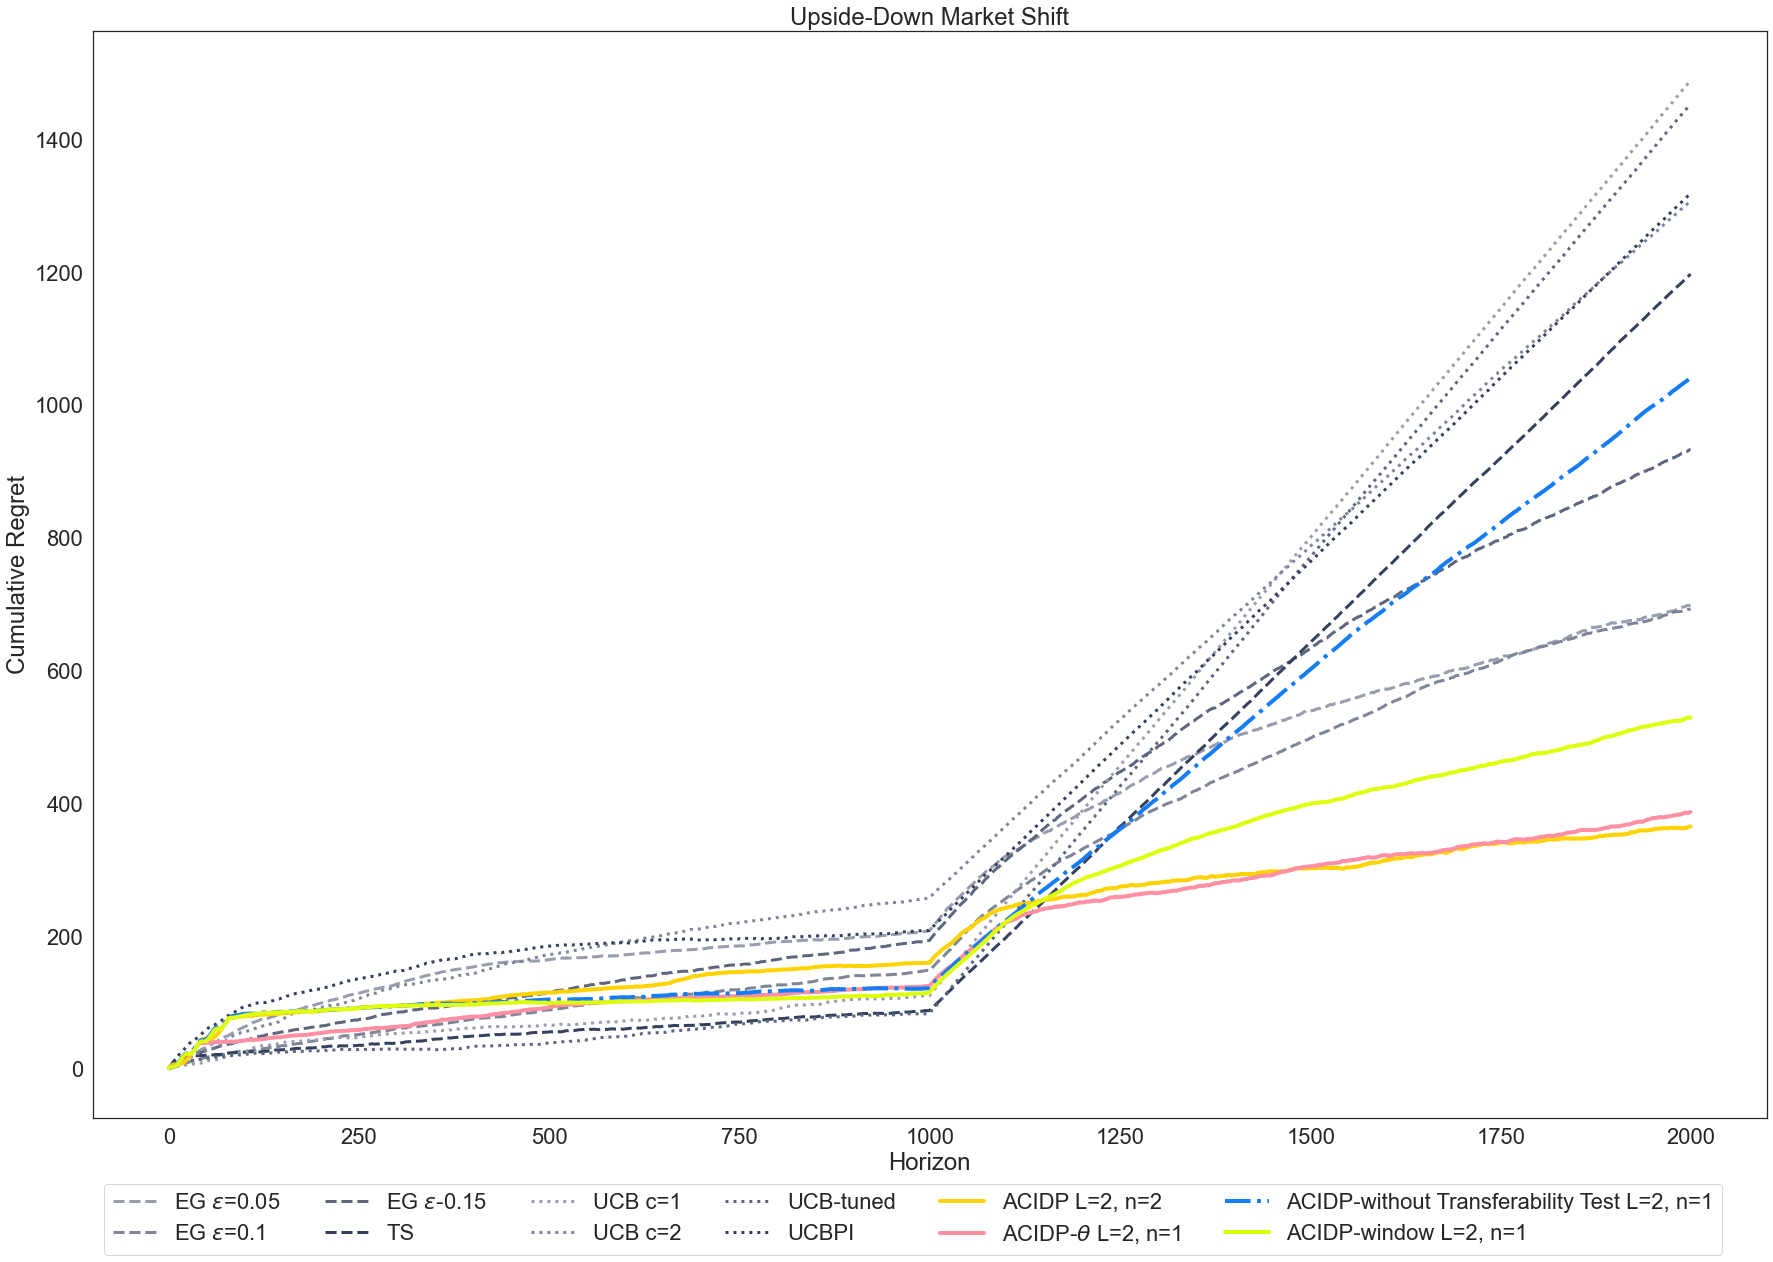

In [50]:
reward = pd.read_csv('/Users/liu/Desktop/雜物/研究/中研院/RA/experiment result/data/exp6_reward.csv')
groups = reward.groupby('policy').mean().iloc[:,1:]
optimal_reward_per = np.append(np.repeat(np.max(df1.groupby('arm')['reward'].mean()), 1000), np.repeat(np.max(df2.groupby('arm')['reward'].mean()), 1000))
optimal_reward_per = pd.DataFrame(optimal_reward_per).T
optimal_reward = optimal_reward_per.cumsum(axis=1)
draw_regret(optimal_reward, groups, title='Upside-Down Market Shift', bounds=False)

In [65]:
def draw_arm_withopt_6(IDSN, IDSW, IDS, TS, UCB, EG, optimal_arm):
    sns.set(font_scale=1.5, style='white')
    figure, axis = plt.subplots(2, 3, figsize=(20,12))

    trial = EG.shape[0]
    X = np.arange(EG.shape[1])
    for i in range(trial):
        axis[0, 0].scatter(x=X, y=IDSN.iloc[i], alpha=0.1, s=10, color='#147DF5')
    axis[0, 0].plot(optimal_arm, color='r', linewidth=3, linestyle='--')
    axis[0, 0].set_ylim([-1, 20])
    axis[0, 0].set_ylabel('Pulled Arms')
    axis[0, 0].set_title('ACIDP-Without Transferability Test')
    
    for i in range(trial):
        axis[0, 1].scatter(x=X, y=IDS.iloc[i], alpha=0.1, s=10, color='#FF6666')
    axis[0, 1].plot(optimal_arm, color='r', linewidth=3, linestyle='--')
    axis[0, 1].set_ylim([-1, 20])
    axis[0, 1].set_ylabel('Pulled Arms')
    axis[0, 1].set_title('ACIDP')
    
    for i in range(trial):
        axis[0, 2].scatter(x=X, y=IDSW.iloc[i], alpha=0.1, s=10, color='#DEFF0A')
    axis[0, 2].plot(optimal_arm, color='r', linewidth=3, linestyle='--')
    axis[0, 2].set_ylim([-1, 20])
    axis[0, 2].set_ylabel('Pulled Arms')
    axis[0, 2].set_title('ACIDP-Variant')

    for i in range(trial):
        axis[1, 0].scatter(x=X, y=TS.iloc[i], alpha=0.1, s=10, color='#666666')
    axis[1, 0].plot(optimal_arm, color='r', linewidth=3, linestyle='--')
    axis[1, 0].set_ylim([-1, 20])
    axis[1, 0].set_ylabel('Pulled Arms')
    axis[1, 0].set_title('TS')

    for i in range(trial):
        axis[1, 1].scatter(x=X, y=UCB.iloc[i], alpha=0.1, s=10, color='#666600')
    axis[1, 0].plot(optimal_arm, color='r', linewidth=3, linestyle='--')
    axis[1, 1].set_ylim([-1, 20])
    axis[1, 1].set_ylabel('Pulled Arms')
    axis[1, 1].set_title('UCB')

    for i in range(trial):
        axis[1, 2].scatter(x=X, y=EG.iloc[i], alpha=0.1, s=10, color='#996633')
    axis[1, 2].plot(optimal_arm, color='r', linewidth=3, linestyle='--')
    axis[1, 2].set_ylim([-1, 20])
    axis[1, 2].set_ylabel('Pulled Arms')
    axis[1, 2].set_title('EG')

    figure.text(0.5, 0.05, 'Horizon')
    plt.show()

In [66]:
arm = pd.read_csv('/Users/liu/Desktop/雜物/研究/中研院/RA/experiment result/data/exp6_arm.csv')
IDS = arm[arm['policy'] == 'IDS_3'].drop(columns=['Unnamed: 0', 'policy'])
IDSN = arm[arm['policy'] == 'IDSN'].drop(columns=['Unnamed: 0', 'policy'])
IDSW = arm[arm['policy'] == 'IDSW'].drop(columns=['Unnamed: 0', 'policy'])
UCB = arm[arm['policy'] == 'UCBT'].drop(columns=['Unnamed: 0', 'policy'])
TS = arm[arm['policy'] == 'TS'].drop(columns=['Unnamed: 0', 'policy'])
EG = arm[arm['policy'] == 'EG_1'].drop(columns=['Unnamed: 0', 'policy'])
optimal_arm = np.append(np.repeat(5, 1000), np.repeat(12, 1000))

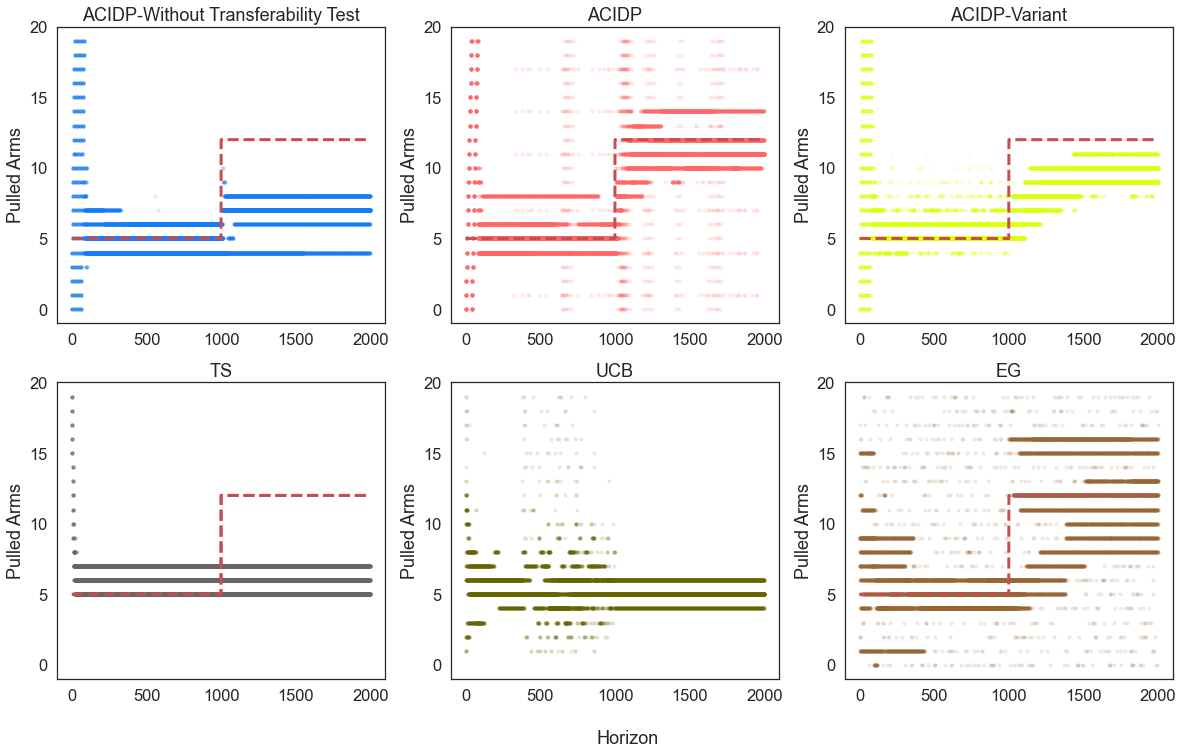

In [67]:
draw_arm_withopt_6(IDSN, IDSW, IDS, TS, UCB, EG, optimal_arm)